In [1]:
from sunpy.net import hek
from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil

# Getting Data 2012

In [2]:
#### opens csv file for non-erupting/transit filaments 2012
tracknumbers_2012_trans=[]
good_track_no_2012_trans=[]
with open('Transit_tracks2012.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_2012_trans.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_2012_trans.pop(i)     #removes heading text for file 
del tracknumbers_2012_trans[0]
##########
for item in tracknumbers_2012_trans:      
    x=float(item)
    good_track_no_2012_trans.append(x)  #appends the track numbers as a float to a new list 
print good_track_no_2012_trans

[160.0, 407.0, 533.0, 939.0, 1118.0, 1265.0, 1500.0, 1928.0, 1930.0, 2004.0, 2155.0, 2397.0, 2466.0, 2838.0]


In [3]:
fi_tracked2012 = pd.read_csv('FIDustinTracked_2012.txt',delimiter='\t')   ##working with filament data 
fi_tracked2012.head()
good_tracks2012 = fi_tracked2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 

In [4]:
###selects the data of interest by csv track numbers 
inds_trans=[]
for i in range(0, len(good_tracks2012)):
    if good_tracks2012['Track No.'][i] in good_track_no_2012_trans:
        inds_trans.append(i)
working_data_2012_trans=good_tracks2012.ix[inds_trans]

# Getting Data Oct. 2013

In [5]:
#### for non-erupting/transit filaments 2013
tracknumbers_oct_2013_trans=[]
good_track_no_oct_2013_trans=[]
with open('Transit_tracks_oct_2013.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_oct_2013_trans.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_oct_2013_trans.pop(i)     #removes heading text for file 
del tracknumbers_oct_2013_trans[0]
##########
for item in tracknumbers_oct_2013_trans:      
    x=float(item)
    good_track_no_oct_2013_trans.append(x)  #appends the track numbers as a float to a new list 
print good_track_no_oct_2013_trans

[97.0, 154.0, 166.0, 185.0, 72.0]


In [10]:
###reads in filament track metadata
fi_tracked_oct_2013 = pd.read_csv('FIDustinTracked_2013_10.txt',delimiter='\t')   ##working with filament data 
fi_tracked_oct_2013.head()
good_tracks_oct_2013 = fi_tracked_oct_2013.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 

In [11]:
inds_trans=[]
for i in range(0, len(good_tracks_oct_2013)):
    if good_tracks_oct_2013['Track No.'][i] in good_track_no_oct_2013_trans:
        inds_trans.append(i)
working_data_oct_2013_trans = good_tracks_oct_2013.ix[inds_trans]

# Smashing together!

In [12]:
all_tracks_trans=[]

length_2012=working_data_2012_trans['fi_length']
time_2012=working_data_2012_trans['HEK_time']
track_2012=working_data_2012_trans['Track No.']
chiral_2012= working_data_2012_trans['fi_chirality']
plot_length_data_2012_trans=zip(track_2012, time_2012, length_2012, chiral_2012)
###############################################
length_2013_10=working_data_oct_2013_trans['fi_length']
time_2013_10=working_data_oct_2013_trans['HEK_time']
track_2013_10=working_data_oct_2013_trans['Track No.']
chiral_2013_10= working_data_oct_2013_trans['fi_chirality']
norm_track_2013=[]
for tr in track_2013_10:
    new = tr + 3000
    norm_track_2013.append(new)
plot_length_data_2013_trans=zip(norm_track_2013, time_2013_10, length_2013_10, chiral_2013_10)
#track number, track time, length, chirality
all_data_trans=plot_length_data_2012_trans+plot_length_data_2013_trans

for element in all_data_trans:
    all_tracks_trans.append(element[0])

# Length Analysis

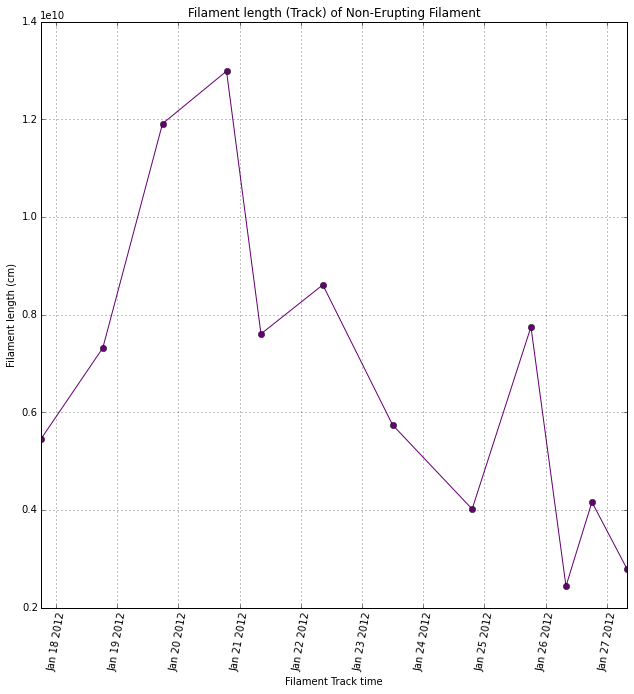

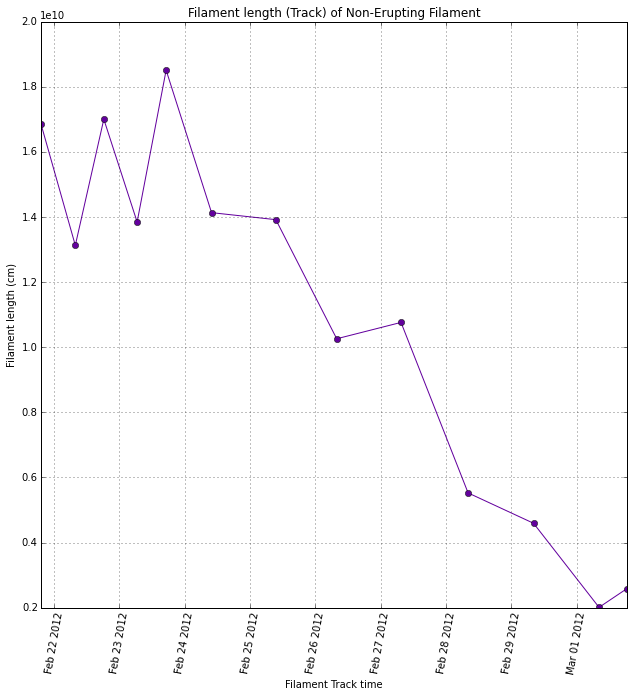

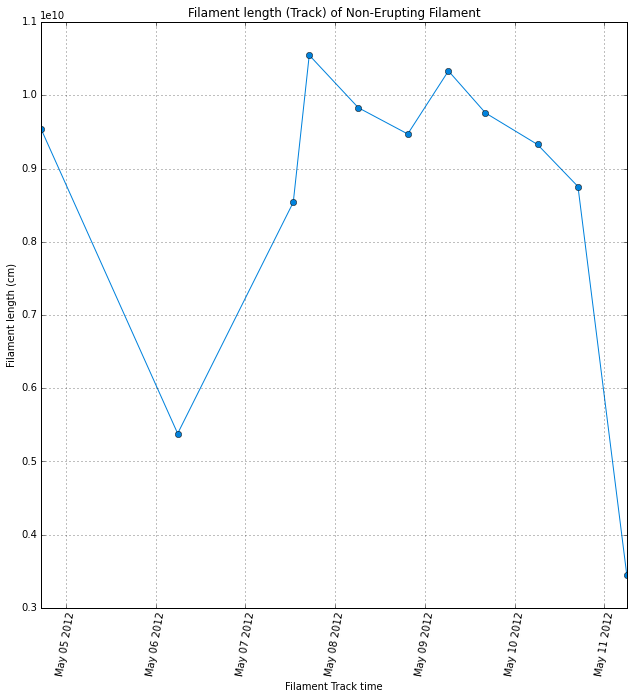

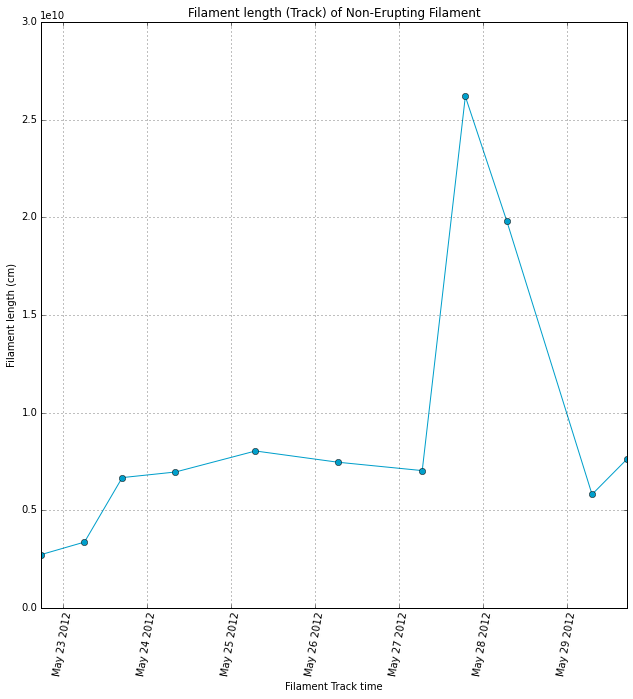

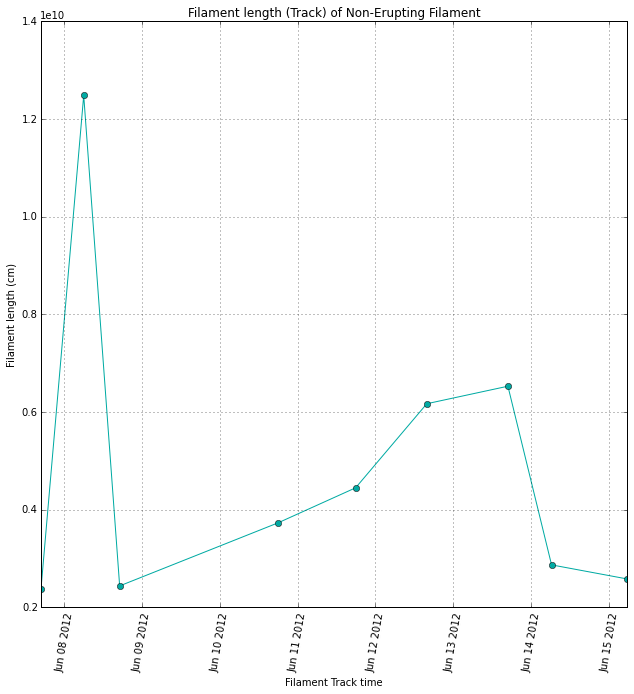

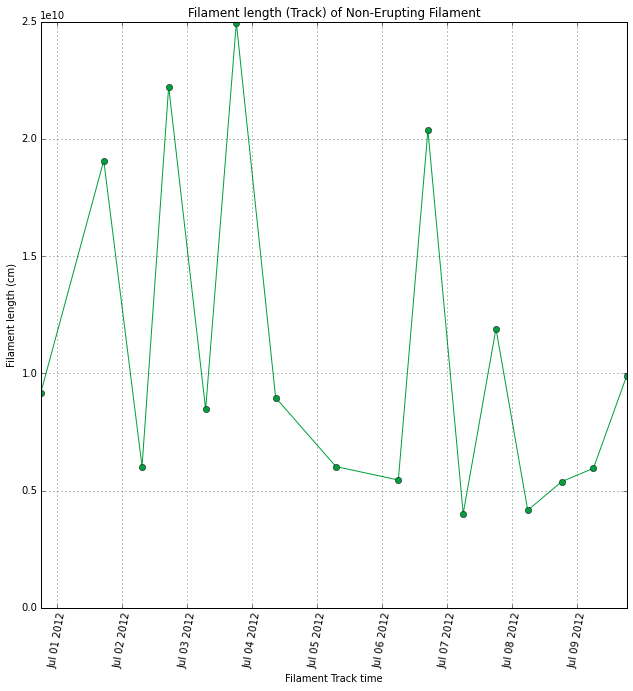

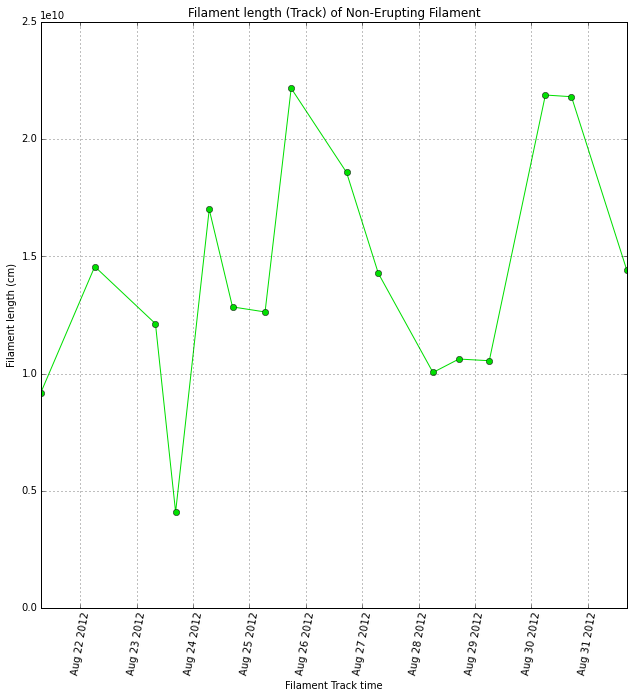

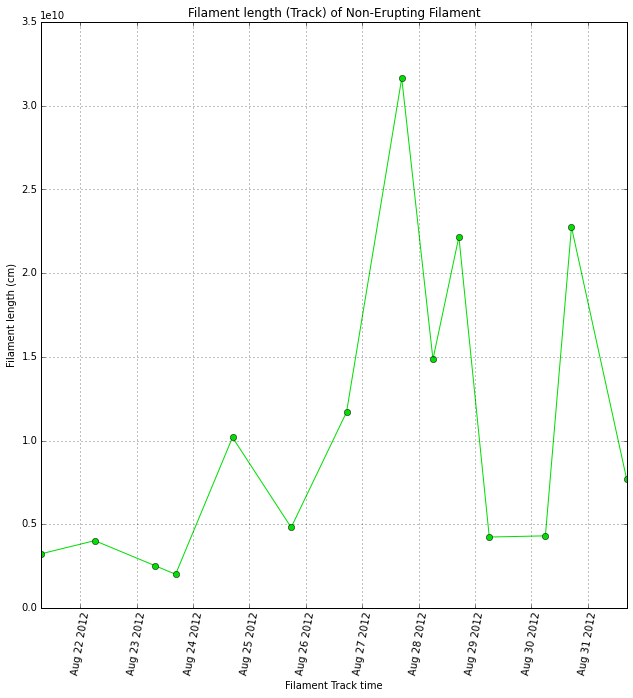

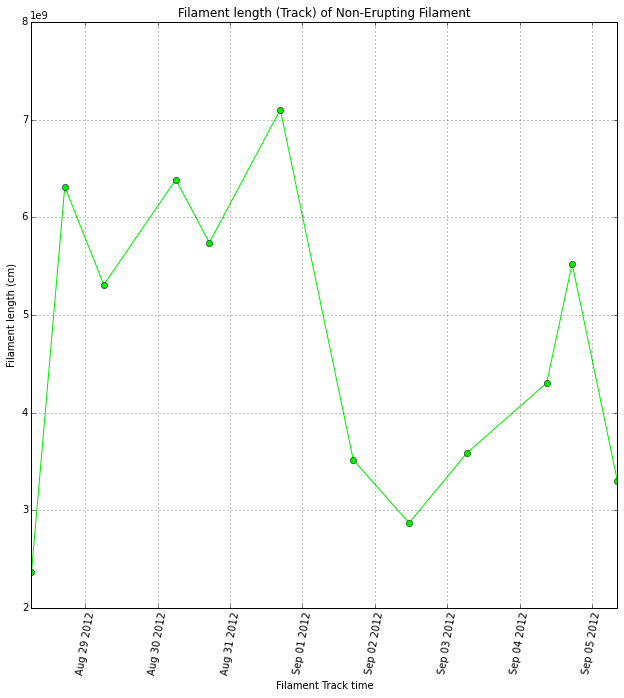

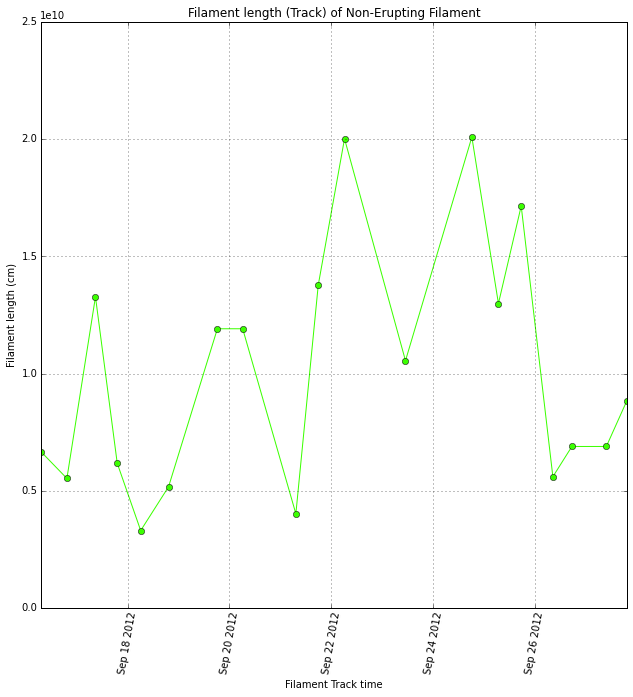

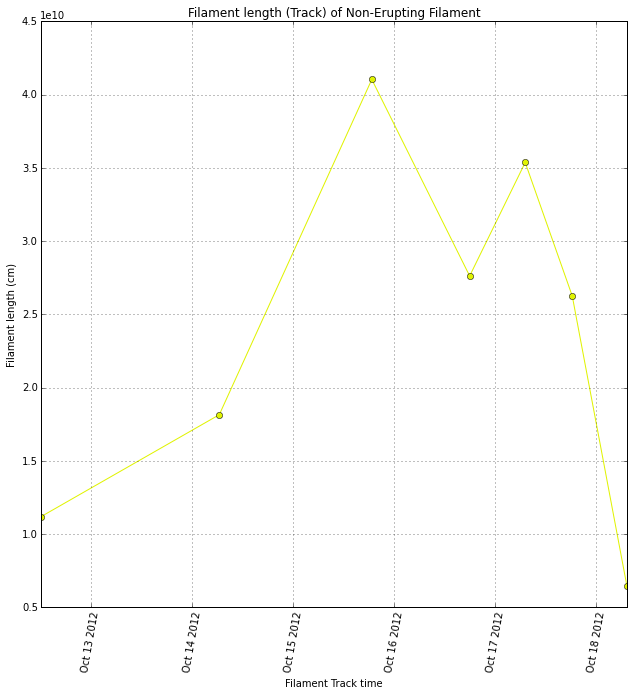

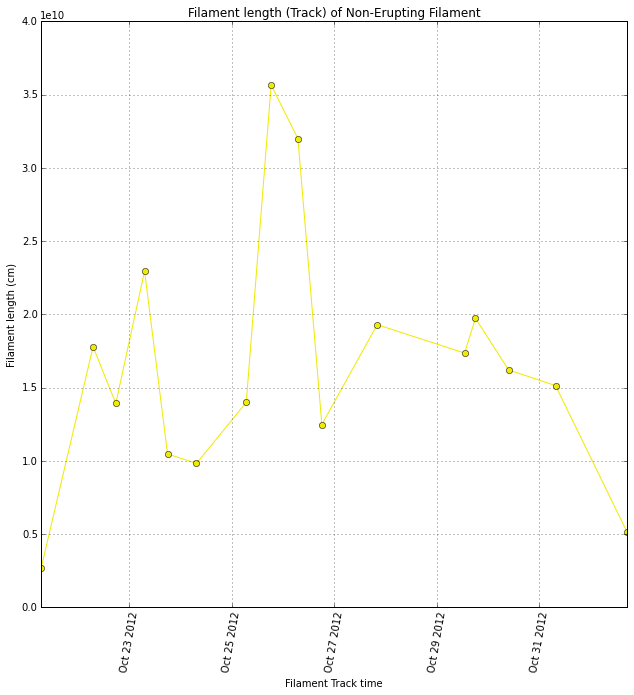

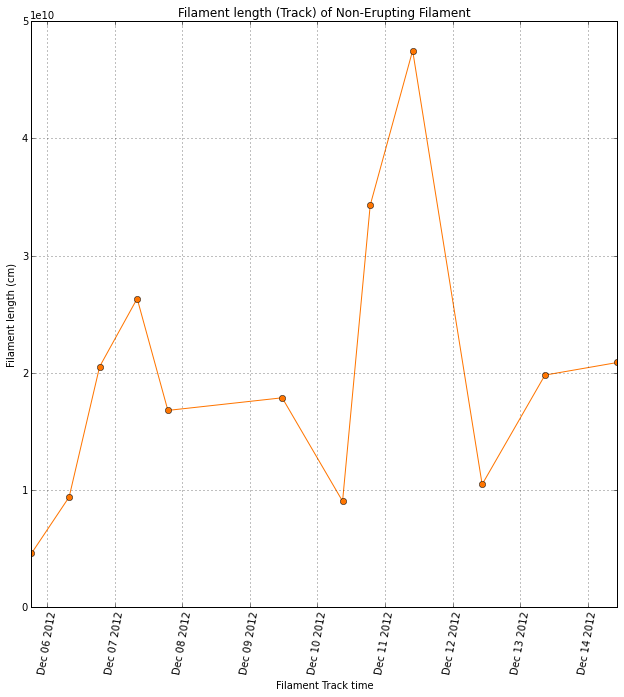

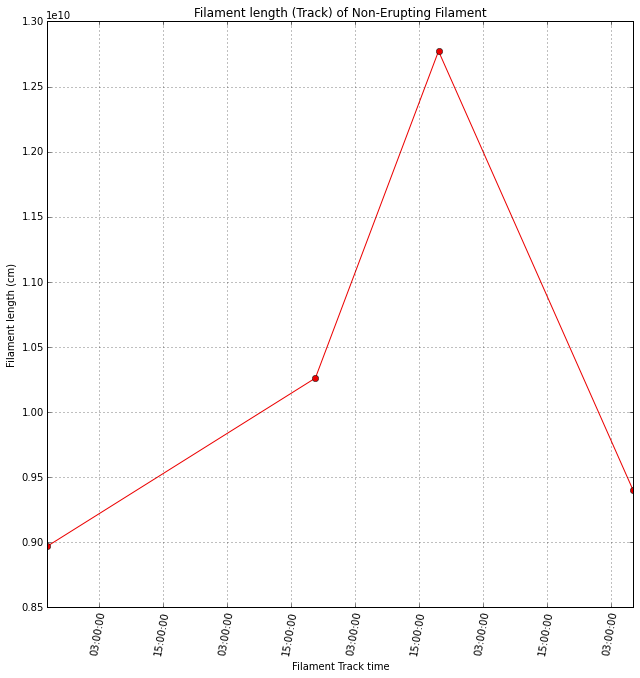

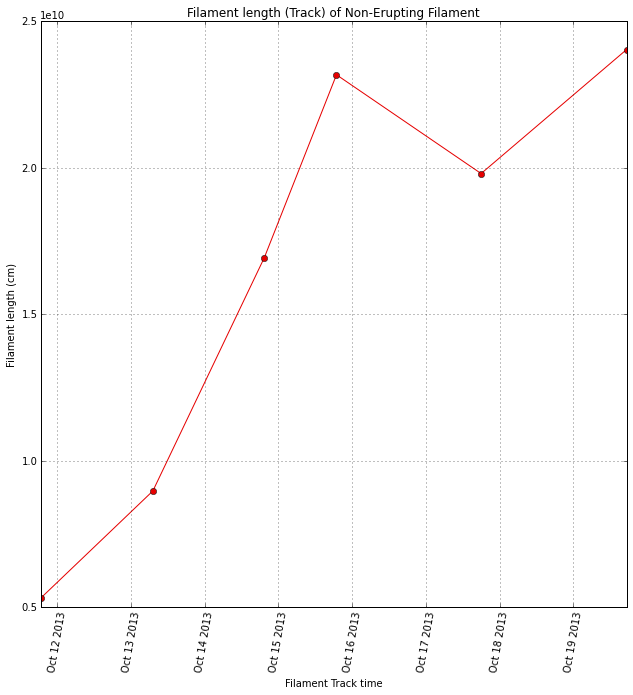

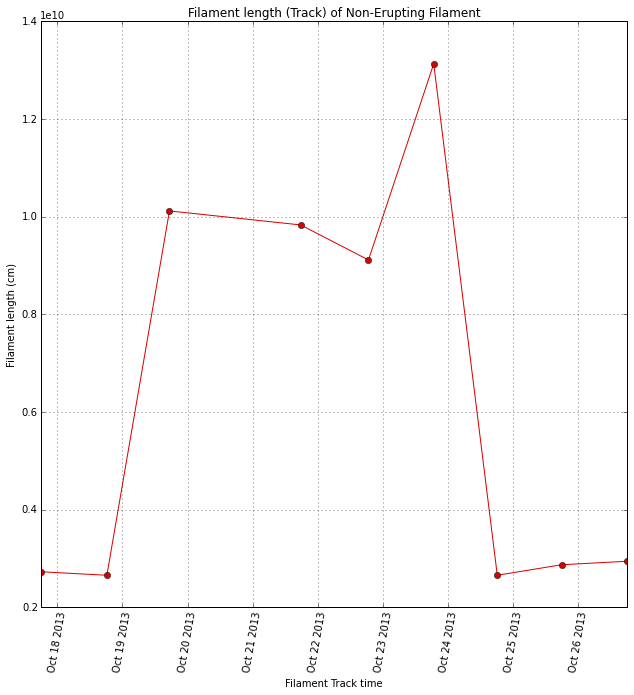

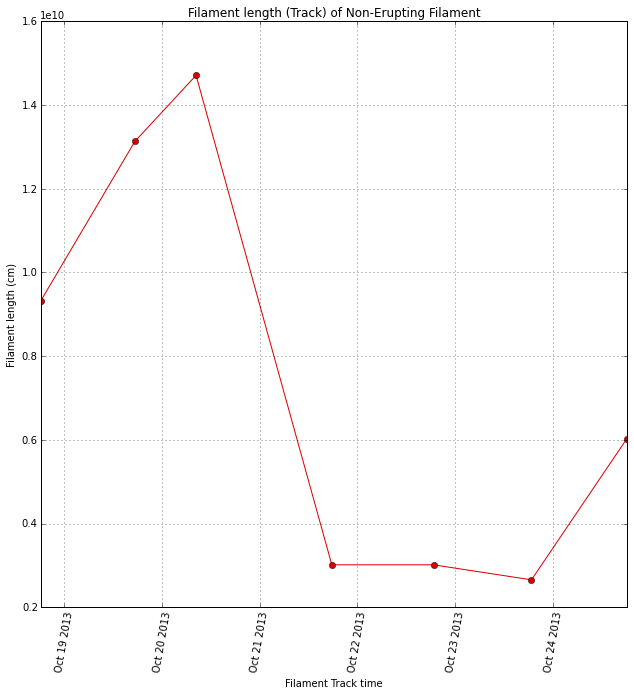

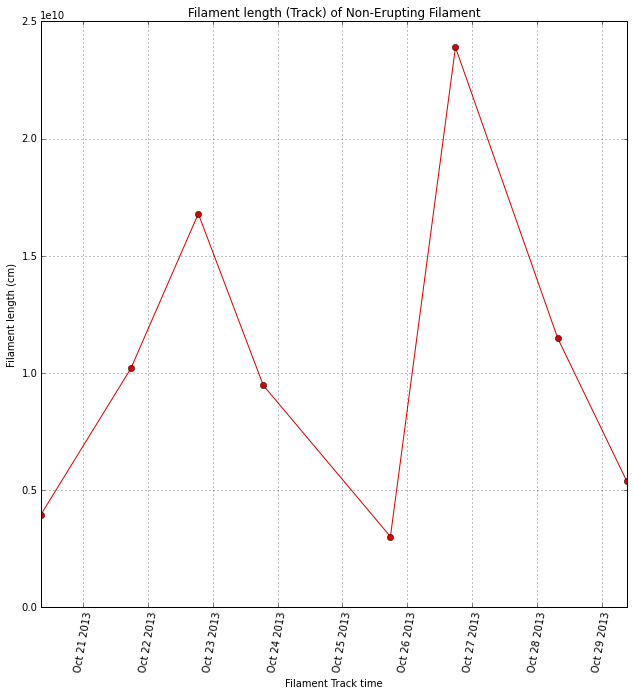

In [17]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    emp=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])  #filament time
        t.append(t1)
        y.append(interest[k][2])
    plt.plot_date(t, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    plt.title('Filament length (Track) of Non-Erupting Filament')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    plt.show()

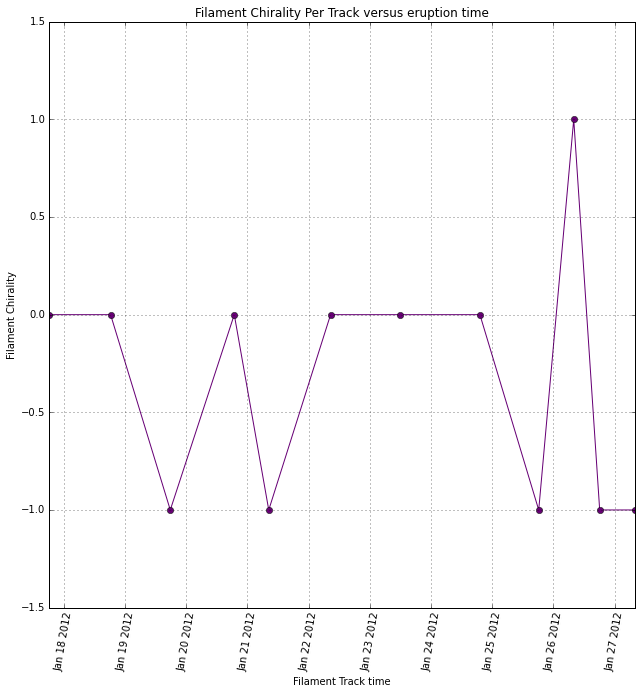

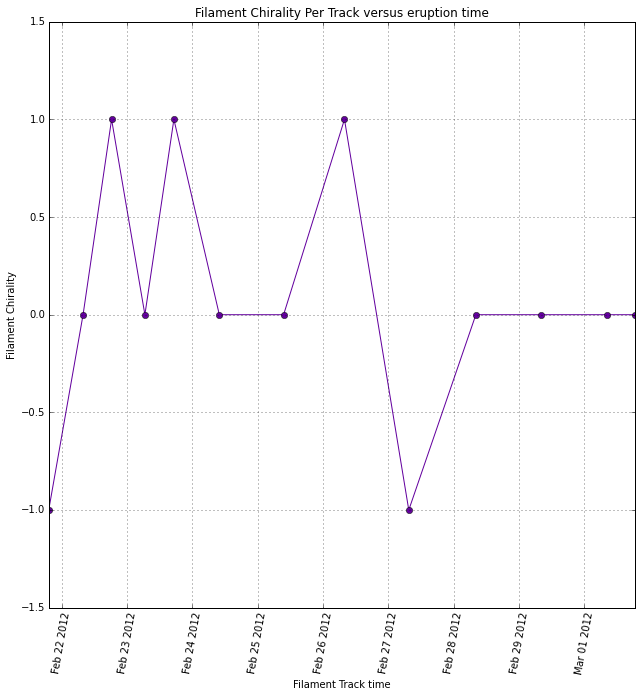

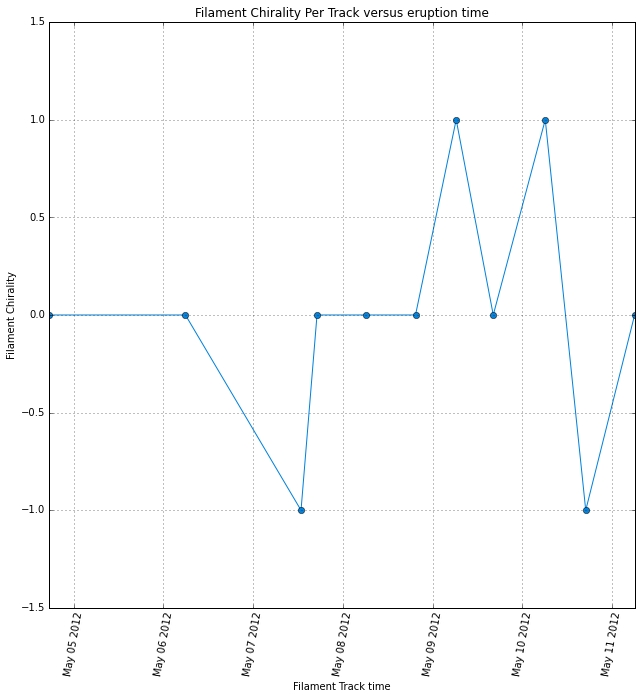

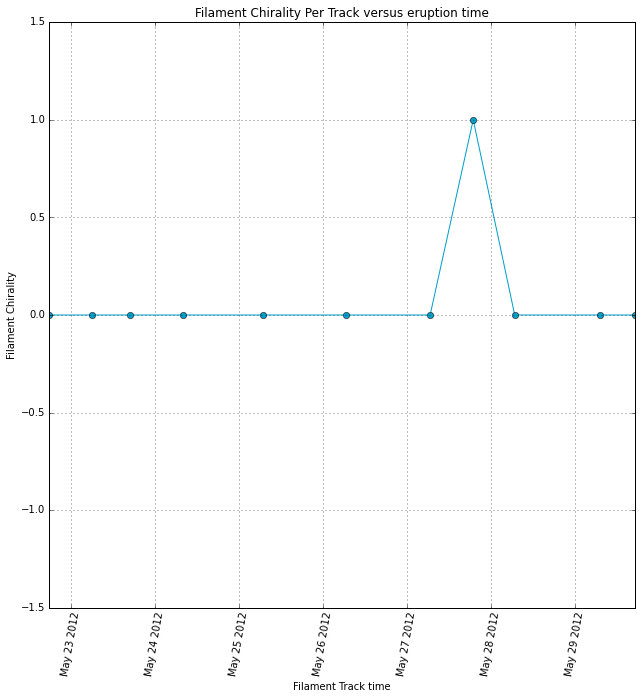

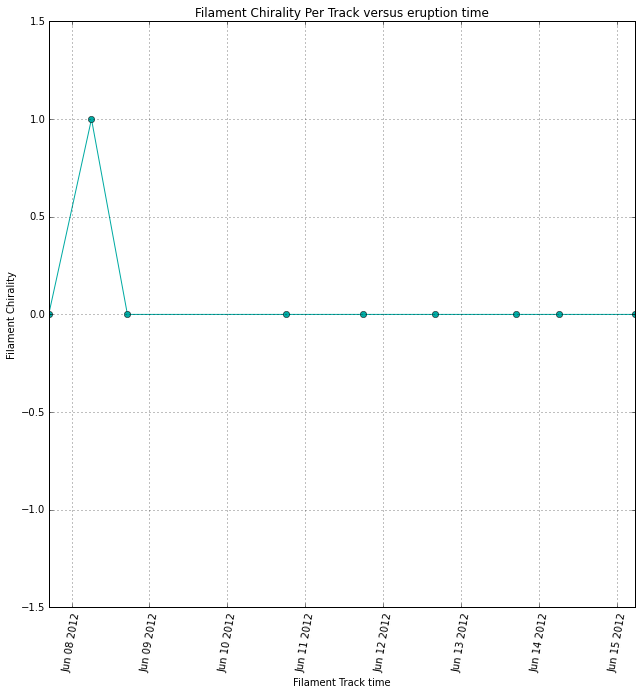

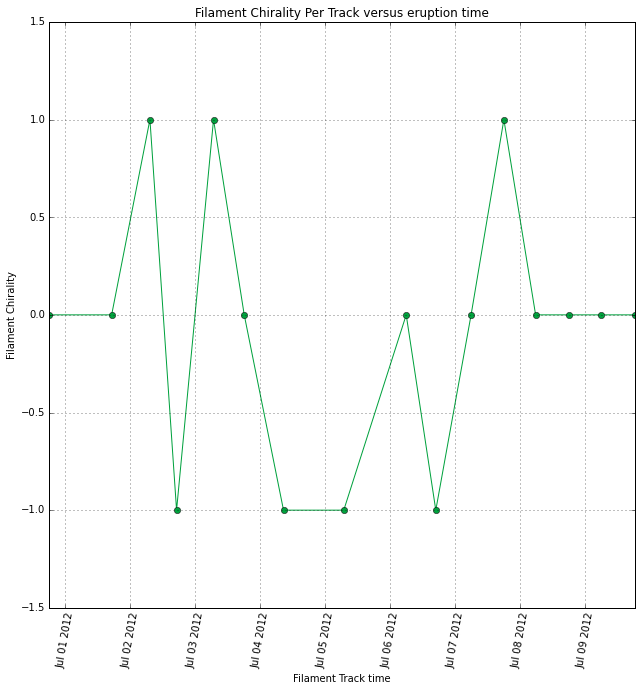

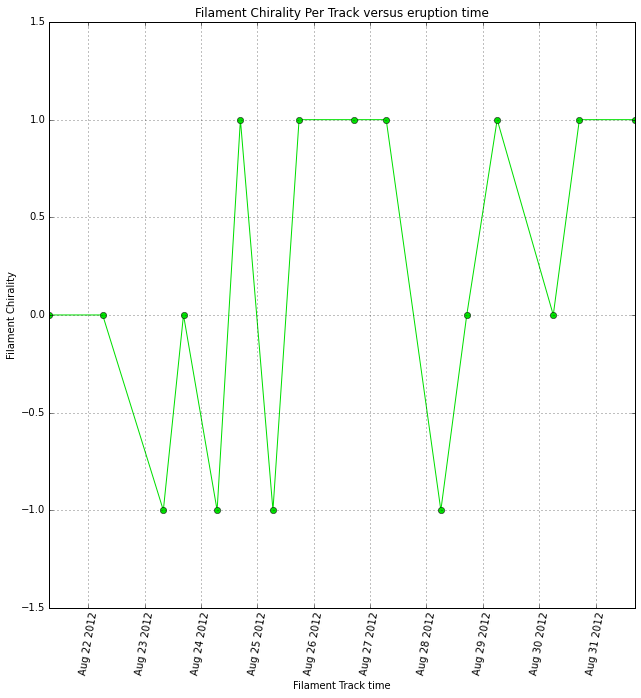

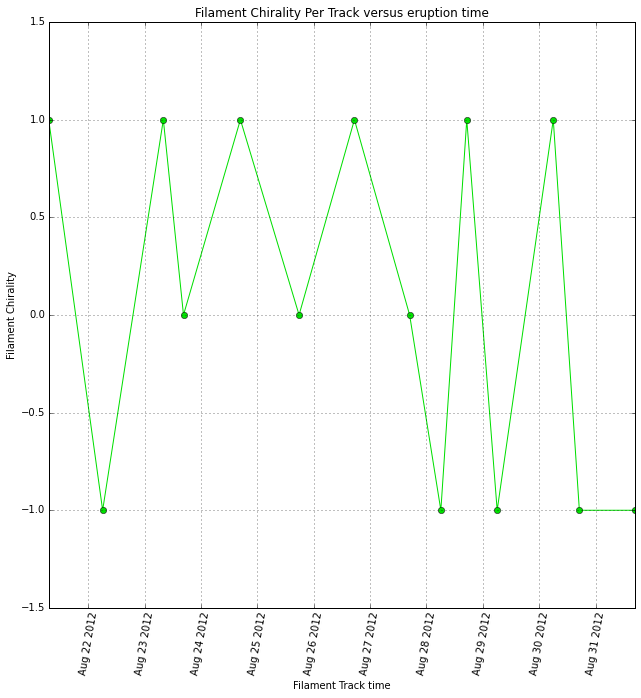

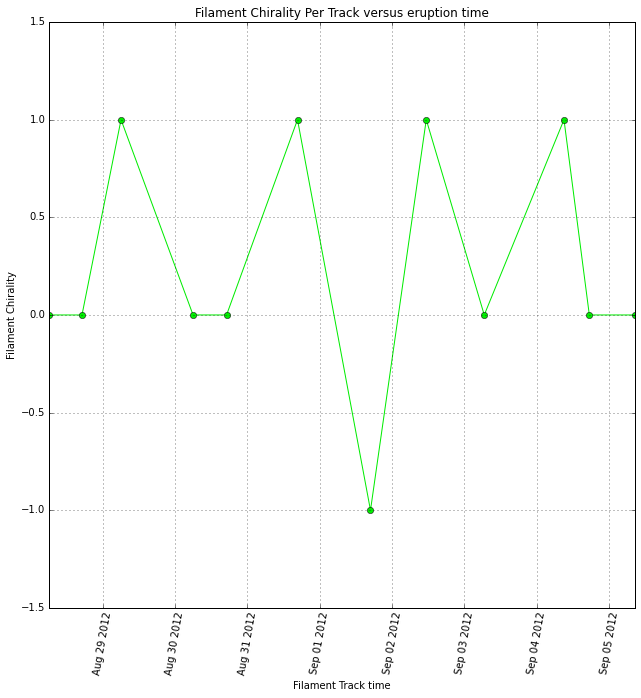

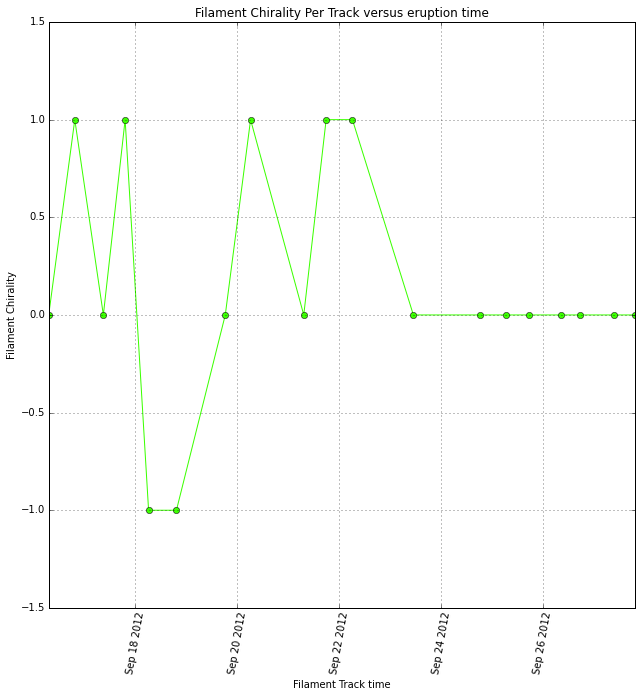

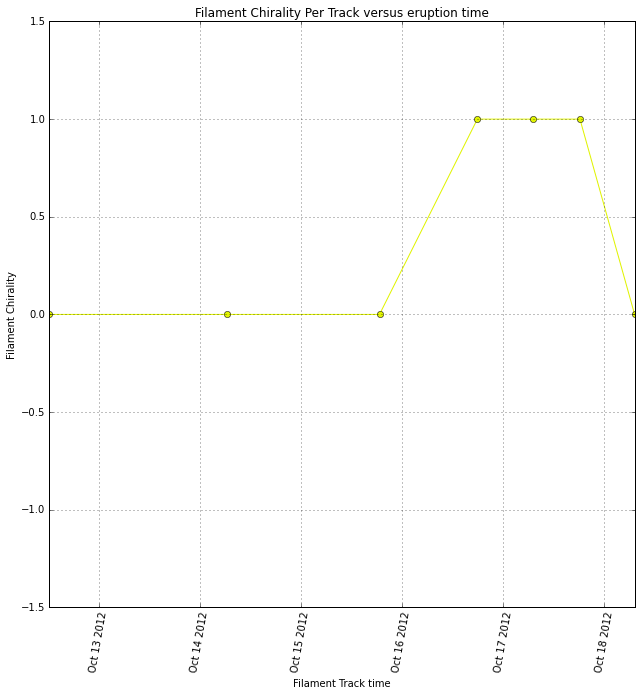

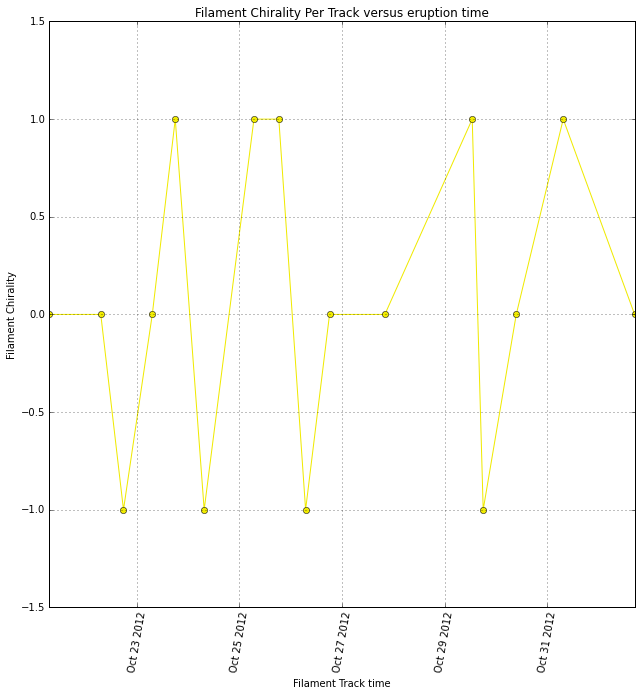

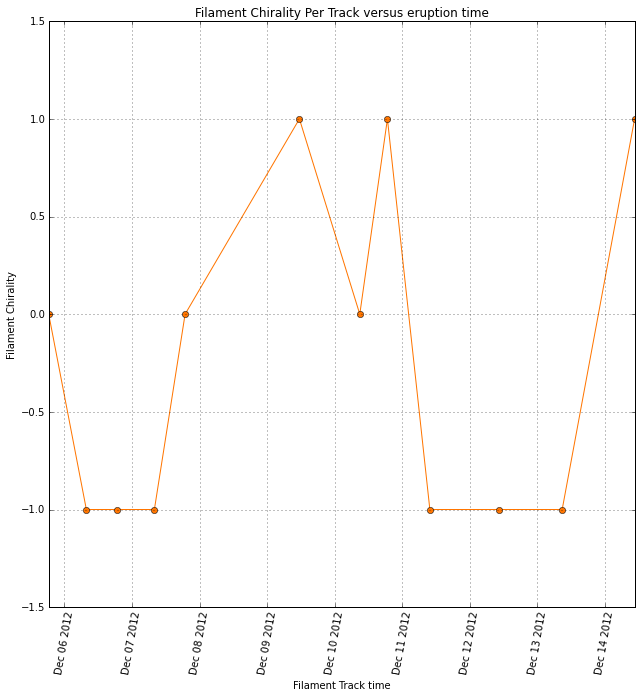

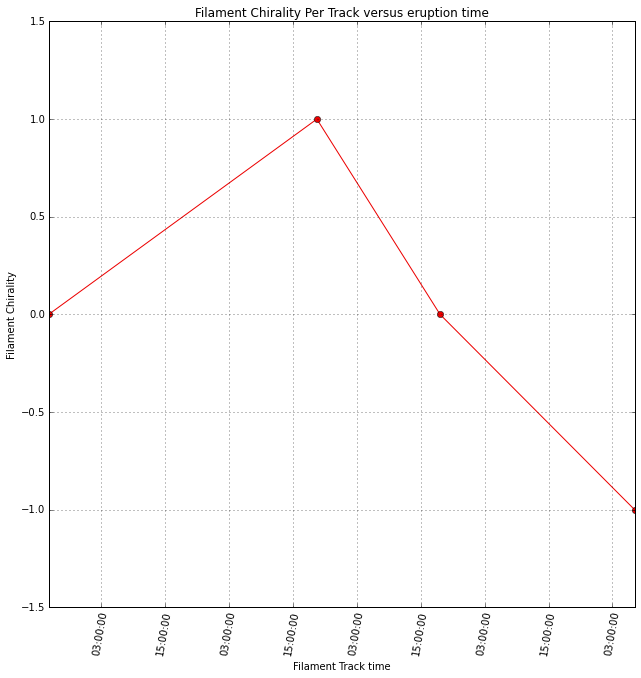

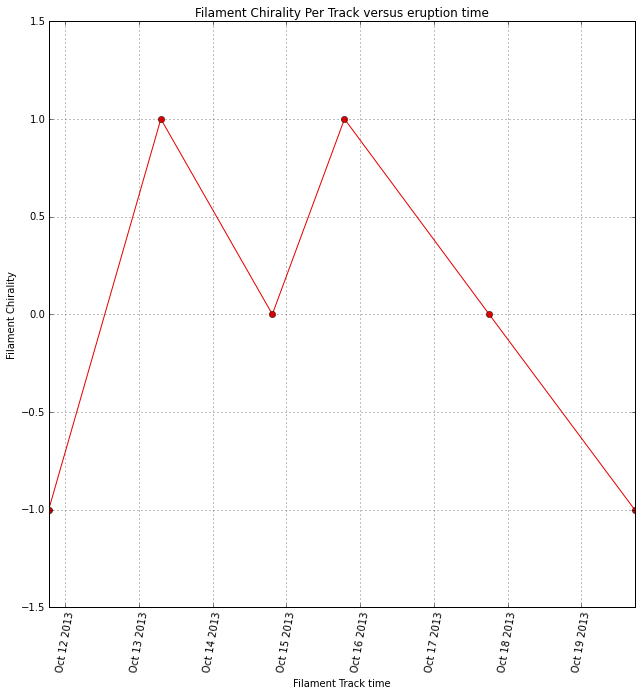

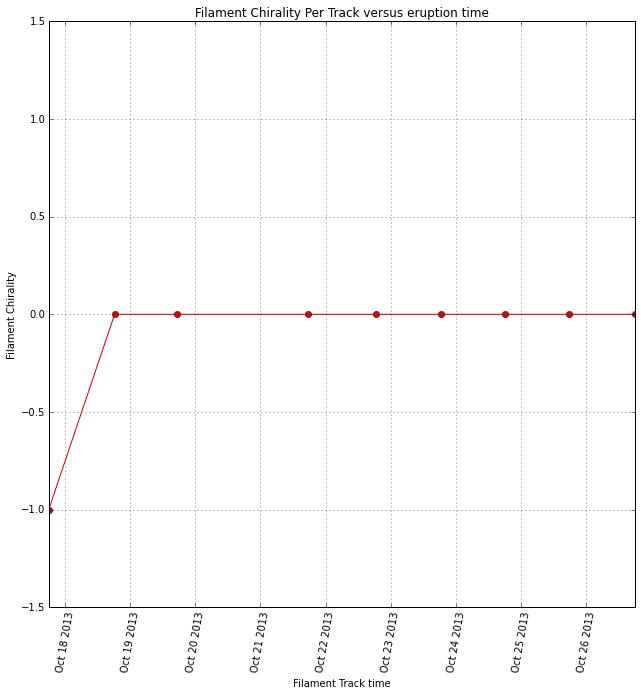

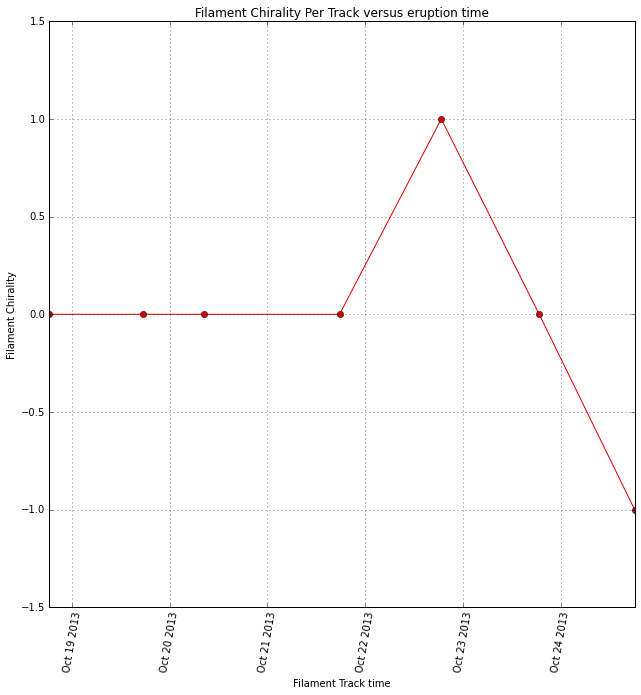

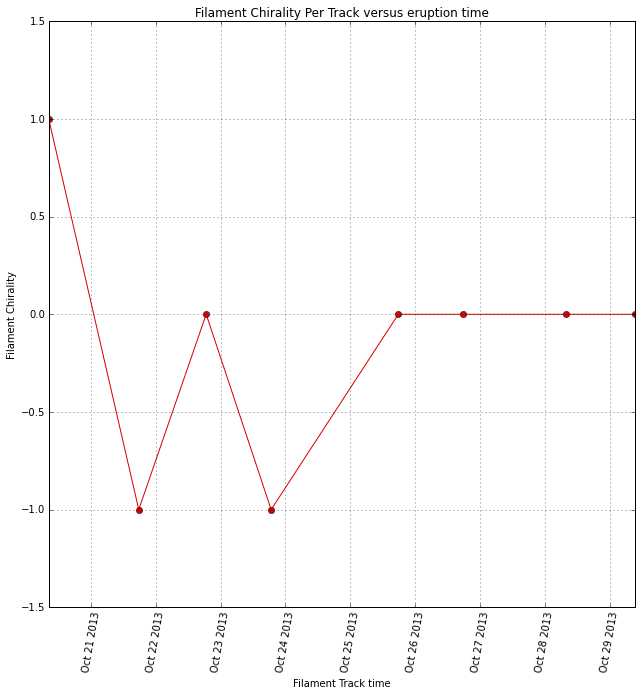

In [24]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    emp=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])    #filament time
        t.append(t1)
        y.append(interest[k][3])
    plt.plot_date(t, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    plt.title('Filament Chirality Per Track versus eruption time')
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.xticks( rotation= 80 )
    plt.ylabel('Filament Chirality')
    plt.show()